In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import pickle
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [3]:
print("CHECKLIST DATA EXPLORER :")
display(os.listdir('./data/'))

CHECKLIST DATA EXPLORER :


['application_test.csv',
 '.DS_Store',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [4]:
application_train = pd.read_csv('data/application_train.csv')
application_test = pd.read_csv('data/application_test.csv')
bureau = pd.read_csv('data/bureau.csv')
bureau_balance = pd.read_csv('data/bureau_balance.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
installments_payments = pd.read_csv('data/installments_payments.csv')
POS_CASH_balance = pd.read_csv('data/POS_CASH_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')

In [5]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description = pd.read_csv('data/HomeCredit_columns_description.csv', encoding = "ISO-8859-1")
description

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [6]:
def data_describe(folder):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''

    data_dict = {}
    for file in folder:
        data = pd.read_csv(file, encoding = 'ISO-8859-1')
        data_dict[file] = [data.shape[0],
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include = ['object']).shape[1],
                            data.select_dtypes(include = ['float']).shape[1],
                            data.select_dtypes(include = ['int']).shape[1],
                            data.select_dtypes(include = ['bool']).shape[1],
                            round(data.memory_usage().sum()/1024**2, 3)]

        comparative_table = pd.DataFrame.from_dict(data = data_dict,
                                                   columns = ['Rows', 'Columns', '%NaN', '%Duplicate', 'object_dtype','float_dtype', 'int_dtype', 'bool_dtype', 'MB_Memory'], 
                                                   orient = 'index')
    return(comparative_table)

In [7]:
# Data description
data_describe(folder = glob.glob('./data/*.csv'))

,Rows,Columns,%NaN,%Duplicate,object_dtype,float_dtype,int_dtype,bool_dtype,MB_Memory
./data/application_test.csv,48744,121,23.81,0.0,16,65,40,0,44.998
./data/HomeCredit_columns_description.csv,219,5,12.15,0.0,4,0,1,0,0.008
./data/POS_CASH_balance.csv,10001358,8,0.07,0.0,1,2,5,0,610.435
./data/credit_card_balance.csv,3840312,23,6.65,0.0,1,15,7,0,673.883
./data/installments_payments.csv,13605401,8,0.01,0.0,0,5,3,0,830.408
./data/application_train.csv,307511,122,24.40,0.0,16,65,41,0,286.227
./data/bureau.csv,1716428,17,13.50,0.0,3,8,6,0,222.620
./data/previous_application.csv,1670214,37,17.98,0.0,16,15,6,0,471.481
./data/bureau_balance.csv,27299925,3,0.00,0.0,1,0,2,0,624.846
./data/sample_submission.csv,48744,2,0.00,0.0,0,1,1,0,0.744


In [8]:
def features(folder):
    '''Comparative data with missing values, 
       and many descriptive statistics.'''

    data_object = {}
    data_numeric = {}

    for file in folder:
        data = pd.read_csv(file, encoding = 'ISO-8859-1')

        data_object[file] = [(x, data[x].dtype, 
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude = ['int', 'float'])]

        data_numeric[file] = [(x, data[x].dtype, 
                               int(data[x].isna().sum().sum()), 
                               int(data[x].count()), 
                               int(data[x].mean()), 
                               round(data[x].std(),1),
                               round(data[x].min(),1), 
                               round(data[x].max(),1)) for x in data.select_dtypes(exclude = 'object')]


    comparative_object = pd.DataFrame.from_dict(data = data_object, orient = 'index')
    dict_of_object = {name: pd.DataFrame(file) for name,file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis = 0)
    df1.columns = ['features', 'dtype', 'nan', 'count']

    comparative_numeric = pd.DataFrame.from_dict(data = data_numeric, orient = 'index')
    dict_of_numeric = {name: pd.DataFrame(file) for name,file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis = 0)
    df2.columns = ['features', 'dtype', 'nan', 'count', 'mean', 'std', 'min', 'max']

    return df1, df2

In [9]:
# Data description
features(folder = glob.glob('./data/*.csv'))[0]

features  \
./data/application_test.csv               0            NAME_CONTRACT_TYPE   
                                          1                   CODE_GENDER   
                                          2                  FLAG_OWN_CAR   
                                          3               FLAG_OWN_REALTY   
                                          4               NAME_TYPE_SUITE   
                                          5              NAME_INCOME_TYPE   
                                          6           NAME_EDUCATION_TYPE   
                                          7            NAME_FAMILY_STATUS   
                                          8             NAME_HOUSING_TYPE   
                                          9               OCCUPATION_TYPE   
                                          10   WEEKDAY_APPR_PROCESS_START   
                                          11            ORGANIZATION_TYPE   
                                          12           FONDKAPREMONT_MODE   
                                          13               HOUSETYPE_MODE   
                                          14           WALLSMATERIAL_MODE   
                                          15          EMERGENCYSTATE_MODE   
./data/HomeCredit_columns_description.csv 0                         Table   
                                          1                           Row   
                                          2                   Description   
                                          3                       Special   
./data/POS_CASH_balance.csv               0          NAME_CONTRACT_STATUS   
./data/credit_card_balance.csv            0          NAME_CONTRACT_STATUS   
./data/application_train.csv              0            NAME_CONTRACT_TYPE   
                                          1                   CODE_GENDER   
                                          2                  FLAG_OWN_CAR   
                                          3               FLAG_OWN_REALTY   
                                          4               NAME_TYPE_SUITE   
                                          5              NAME_INCOME_TYPE   
                                          6           NAME_EDUCATION_TYPE   
                                          7            NAME_FAMILY_STATUS   
                                          8             NAME_HOUSING_TYPE   
                                          9               OCCUPATION_TYPE   
                                          10   WEEKDAY_APPR_PROCESS_START   
                                          11            ORGANIZATION_TYPE   
                                          12           FONDKAPREMONT_MODE   
                                          13               HOUSETYPE_MODE   
                                          14           WALLSMATERIAL_MODE   
                                          15          EMERGENCYSTATE_MODE   
./data/bureau.csv                         0                 CREDIT_ACTIVE   
                                          1               CREDIT_CURRENCY   
                                          2                   CREDIT_TYPE   
./data/previous_application.csv           0            NAME_CONTRACT_TYPE   
                                          1    WEEKDAY_APPR_PROCESS_START   
                                          2   FLAG_LAST_APPL_PER_CONTRACT   
                                          3        NAME_CASH_LOAN_PURPOSE   
                                          4          NAME_CONTRACT_STATUS   
                                          5             NAME_PAYMENT_TYPE   
                                          6            CODE_REJECT_REASON   
                                          7               NAME_TYPE_SUITE   
                                          8              NAME_CLIENT_TYPE   
                                          9           NAME_GOODS_CATEGORY   
                                          10               NA

In [10]:
# Data description
features(folder = glob.glob('./data/*.csv'))[1]

features    dtype  \
./data/application_test.csv     0                  SK_ID_CURR    int64   
                                1                CNT_CHILDREN    int64   
                                2            AMT_INCOME_TOTAL  float64   
                                3                  AMT_CREDIT  float64   
                                4                 AMT_ANNUITY  float64   
...                                                       ...      ...   
./data/previous_application.csv 20  NFLAG_INSURED_ON_APPROVAL  float64   
./data/bureau_balance.csv       0                SK_ID_BUREAU    int64   
                                1              MONTHS_BALANCE    int64   
./data/sample_submission.csv    0                  SK_ID_CURR    int64   
                                1                      TARGET  float64   

                                       nan     count     mean       std  \
./data/application_test.csv     0        0     48744   277796  103169.5   
                                1        0     48744        0       0.7   
                                2        0     48744   178431  101522.6   
                                3        0     48744   516740  365397.0   
                                4       24     48720    29426   16016.4   
...                                    ...       ...      ...       ...   
./data/previous_application.csv 20  673065    997149        0       0.5   
./data/bureau_balance.csv       0        0  27299925  6036297  492348.9   
                                1        0  27299925      -30      23.9   
./data/sample_submission.csv    0        0     48744   277796  103169.5   
                                1        0     48744        0       0.0   

                                          min        max  
./data/application_test.csv     0    100001.0   456250.0  
                                1         0.0       20.0  
                                2     26941.5  4410000.0  
                                3     45000.0  2245500.0  
                                4      2295.0   180576.0  
...                                       ...        ...  
./data/previous_application.csv 20        0.0        1.0  
./data/bureau_balance.csv       0   5001709.0  6842888.0  
                                1       -96.0        0.0  
./data/sample_submission.csv    0    100001.0   456250.0  
                                1         0.5        0.5  

[288 rows x 8 columns]

### EDA application_train.csv | test.csv
La première partie permet d'illustrer globalement les données disponibles. Il est nécessaire d'approfondir l'analyse des features du ou des principaux fichiers.

In [11]:
print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [12]:
#Check if 'TARGET' is the only difference ;-)
display(application_train.columns.difference(application_test.columns))
print("Check theses two files for Train (with TARGET) and Test (without TARGET).")

Index(['TARGET'], dtype='object')

Check theses two files for Train (with TARGET) and Test (without TARGET).


In [13]:
#Distribution of the Target Column
application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

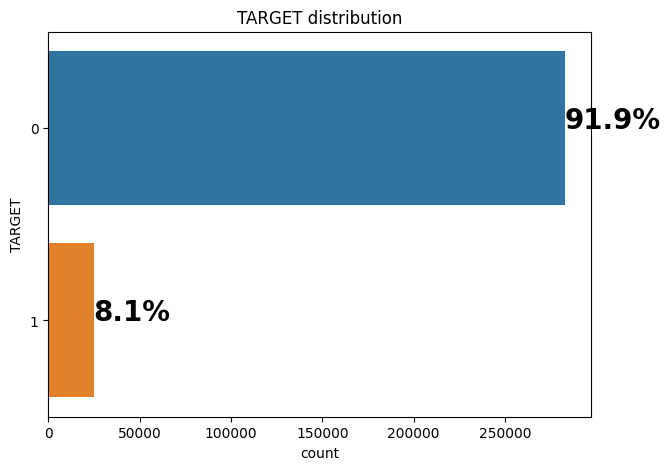

In [14]:
ax, fig = plt.subplots(figsize = (7, 5))
ax = sns.countplot(y = 'TARGET', data = application_train)
ax.set_title("TARGET distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(application_train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize = 20, fontweight = 'bold')
        
plt.show()

Notons des classes déséquilibrées. Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre.

### Types de colonnes
Analyse rapide du type de features, mais surtout établir un aperçu afin de pouvoir poser une réflexion sur l'encodage des données catégorielles.

In [15]:
#Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [16]:
#Number of unique classes in each object column
application_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles…

### Valeurs manquantes
En modélisation, des modèles tels que XGBoost peuvent gérer les valeurs manquantes sans imputation. Plusieurs alternatives seront possibles: remplacer les NaN, supprimer les colonnes avec un pourcentage élevé de valeurs manquantes (impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle). Dans l'immédiat toutes les colonnes sont conservées…

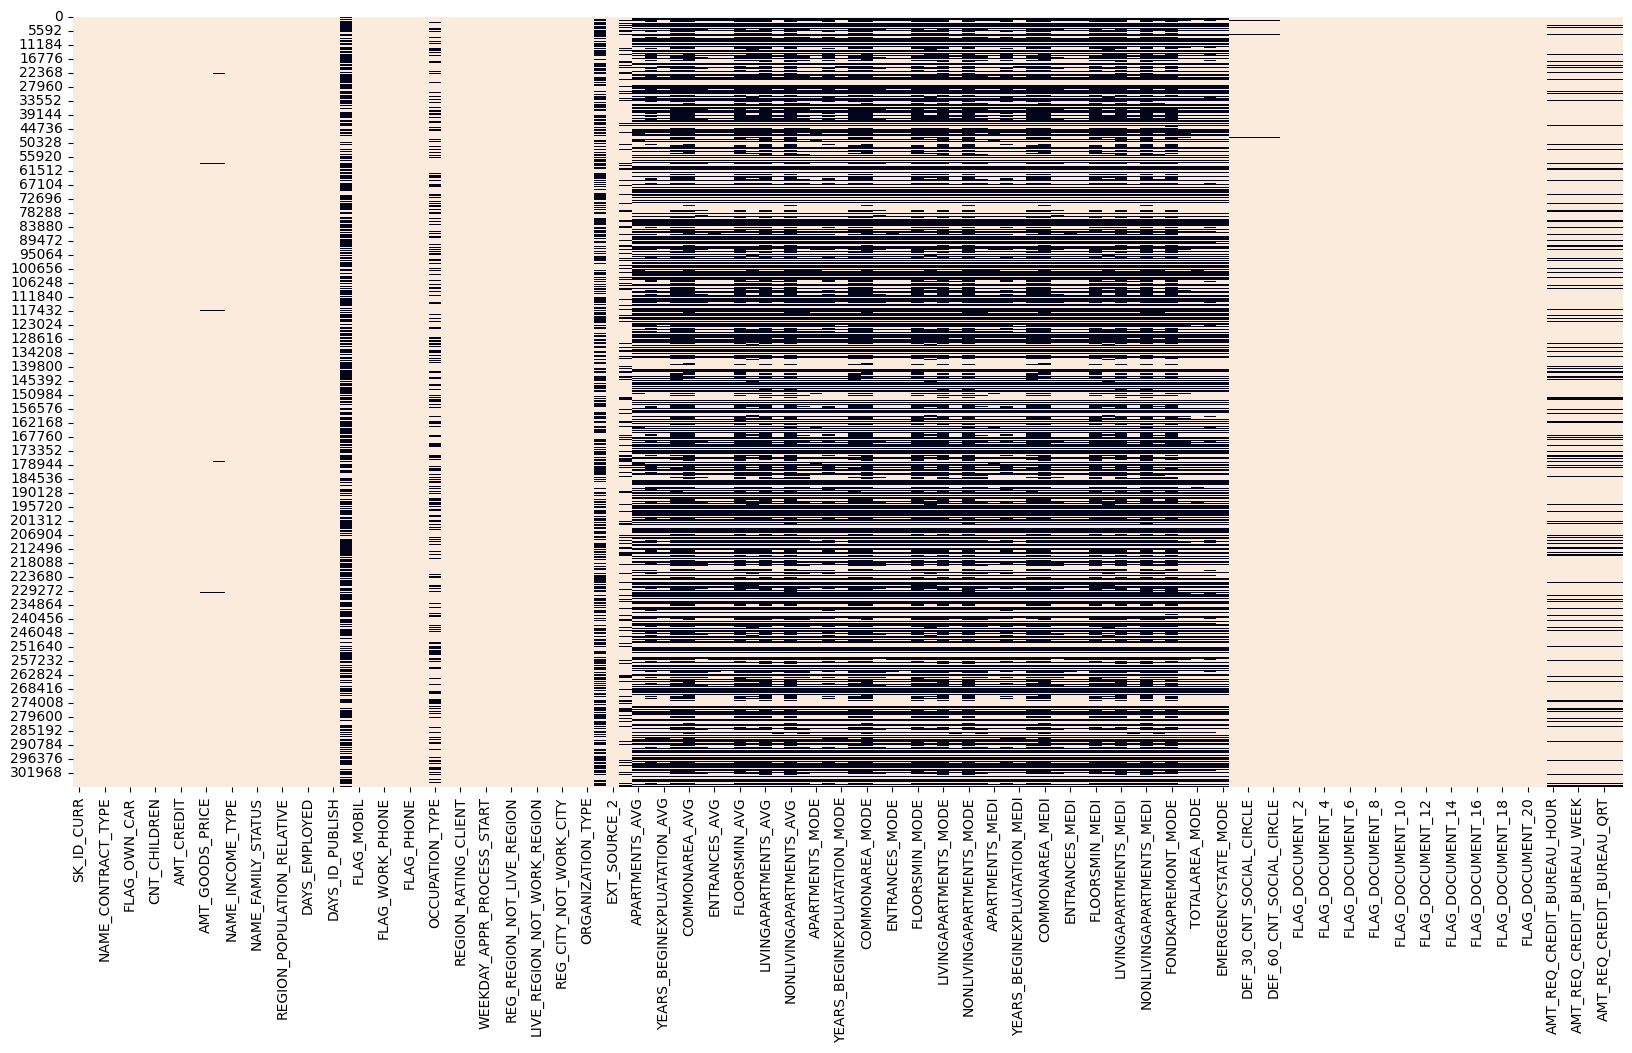

In [17]:
#Global view of the missing values (black)
plt.figure(figsize = (20, 10))
sns.heatmap(application_train.notna(), cbar = False)
plt.show()

Une synthèse des données manquantes un peu confuse du fait du grand nombre de variables, mais il se dégage un premier constat qui montre que les NaN sont plus fortement présentent sur les caractéristiques des habitats (et non sur les crédits), comme l'atteste le TOP 10 ci-après…

In [18]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2],
                             axis = 1, keys = ['Total', '%']).sort_values('%', ascending = False)
    return missing_data

print('TOP 10 Missing values from Training dataset')
nan_check(application_train)[:10]

TOP 10 Missing values from Training dataset


,Total,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [19]:
print("Nb of columns in the training sample: " + str(len(nan_check(application_train))))

print("Nb of columns in the training sample with missing values: " + 
      str(len(nan_check(application_train)[nan_check(application_train)['Total'] != 0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


### Outliers, valeurs atypiques, anormales
En préambule, le constat est simple, des variables comme 'DAYS_BIRTH' ont des valeurs négatives. Il est donc important de pouvoir analyser et si besoin rectifier ce type de données.

In [20]:
#Client's age in days at the time of application (def. from HomeCredit_columns_description.csv)
application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Les nombres de la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours. Il est nécessaire de modifier cette variable pour obtenir des chiffres plus compréhensibles pour l'analyse.

In [21]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

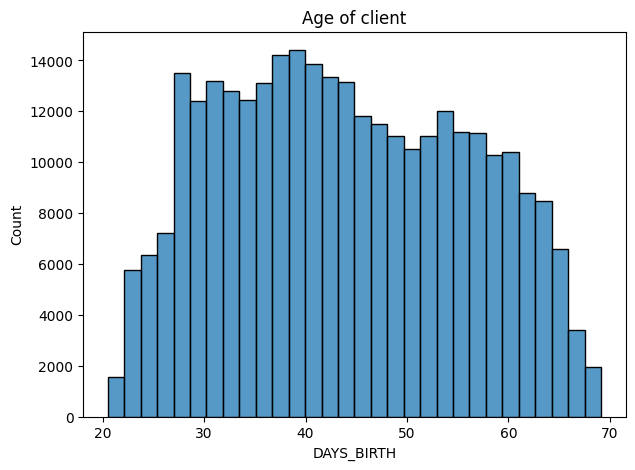

In [22]:
plt.figure(figsize = (7, 5))
sns.histplot((application_train['DAYS_BIRTH'] / -365), bins = 30).set_title('Age of client')
plt.show()

In [23]:
#How many days before the application the perso... (def. from HomeCredit_columns_description.csv)
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

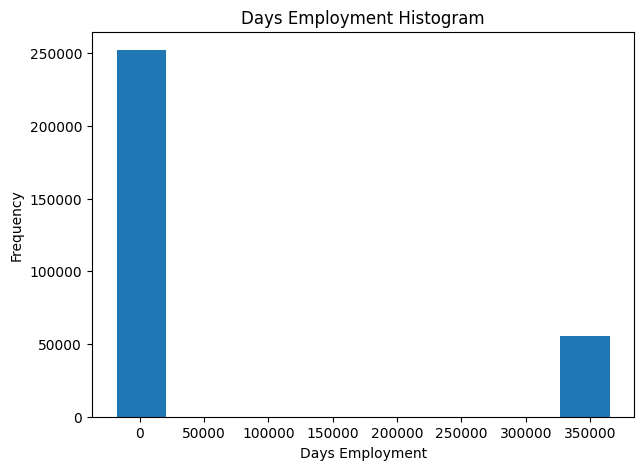

In [24]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', figsize = (7, 5))
plt.xlabel('Days Employment')
plt.show()

Idem ces données ne sont pas "normales" au sens où le Max. représente 1000 années (365243/365j).
Est-ce un individu isolé? Plusieurs individus de l'échantillon?

In [25]:
print("%0.0f values with 365243 days employed for training data" % 
      len(application_train[application_train['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for training data" % application_train.shape[0])

55374 values with 365243 days employed for training data
307511 Total values from days employed for training data


In [26]:
#Create an outliers flag column
application_train['DAYS_EMPLOYED_OUTLIERS'] = application_train["DAYS_EMPLOYED"] == 365243

#Replace outliers values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

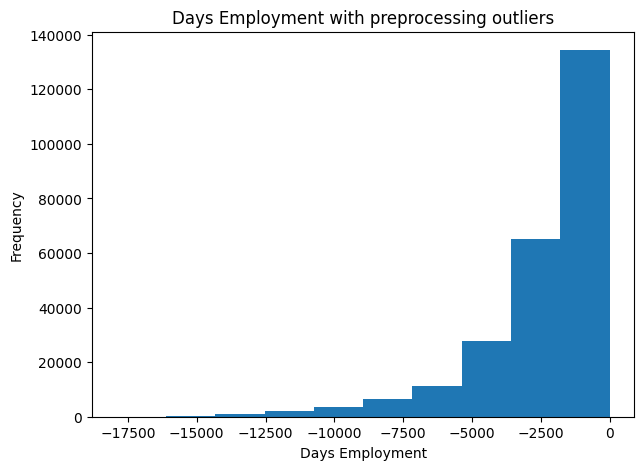

In [27]:
application_train['DAYS_EMPLOYED'].plot.hist(title ='Days Employment with preprocessing outliers', figsize = (7, 5))
plt.xlabel('Days Employment')
plt.show()

### Fonctions pour faciliter l'analyse des principales variables…
Il est important de se focaliser sur les principales features pouvant être explicatives. Ici l'idée n'est pas de tout analyser en univarié ou multivarié, mais simplement d'avoir une image des points métiers qui aident à orienter nos décisions dans la "prise de risque" à l'attribution d'un crédit.

In [28]:
def plot_stat(data, feature, title):

    ax, fig = plt.subplots(figsize = (7, 5))
    ax = sns.countplot(y = feature, data = data, order=data[feature].value_counts(ascending = False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize = 14, fontweight = 'bold')

    plt.show()

In [29]:
def plot_percent_target1(data, feature, title):

    cat_perc = data[[feature, 'TARGET']].groupby([feature], as_index = False).mean()
    cat_perc.sort_values(by = 'TARGET', ascending = False, inplace = True)
    
    ax, fig = plt.subplots(figsize = (7, 5))
    ax = sns.barplot(y = feature, x = 'TARGET', data = cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize = 14, fontweight = 'bold')

    plt.show()

**Loan types -** Distribution du type de prêts contractés + comparatif avec le pourcentage des prêts avec la valeur TARGET 1(prêt non retourné).

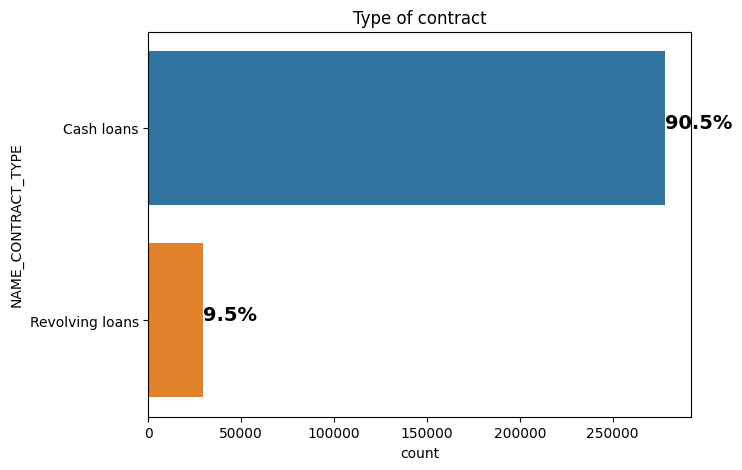

                                   -------------------------------------------------------


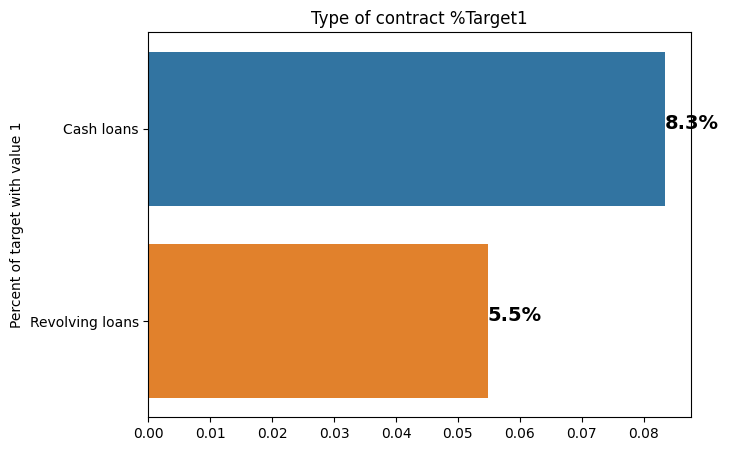

In [30]:
#NAME_CONTRACT_TYPE
plot_stat(application_train, 'NAME_CONTRACT_TYPE',"Type of contract")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_train, 'NAME_CONTRACT_TYPE',"Type of contract %Target1")

Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts; dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

**Client gender -** Distribution H/F clients, mais aussi le pourcentage des prêts (par sexe du client) avec la valeur TARGET 1 (prêt non retourné).

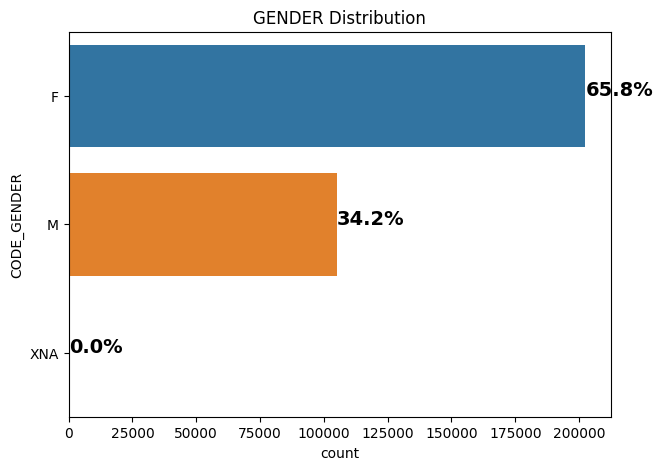

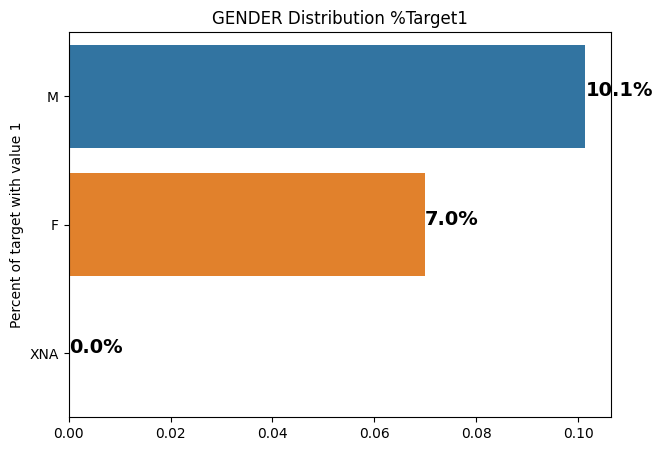

In [31]:
#CODE_GENDER
plot_stat(application_train, 'CODE_GENDER',"GENDER Distribution")

plot_percent_target1(application_train, 'CODE_GENDER',"GENDER Distribution %Target1")

Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

**Flag own car -** Distribution d'un impact possible entre les clients propriétaire d'un véhicule et ceux qui ne le sont pas…

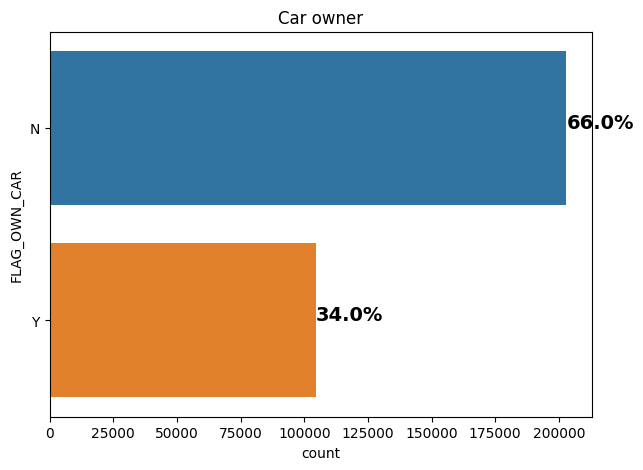

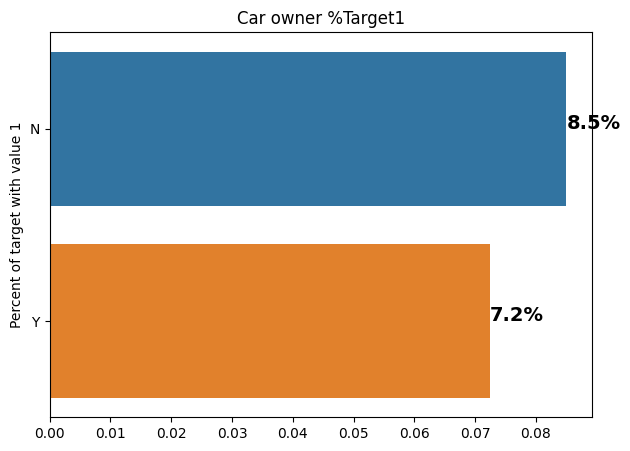

In [32]:
#FLAG_OWN_CAR
plot_stat(application_train, 'FLAG_OWN_CAR',"Car owner")

plot_percent_target1(application_train, 'FLAG_OWN_CAR',"Car owner %Target1")

Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

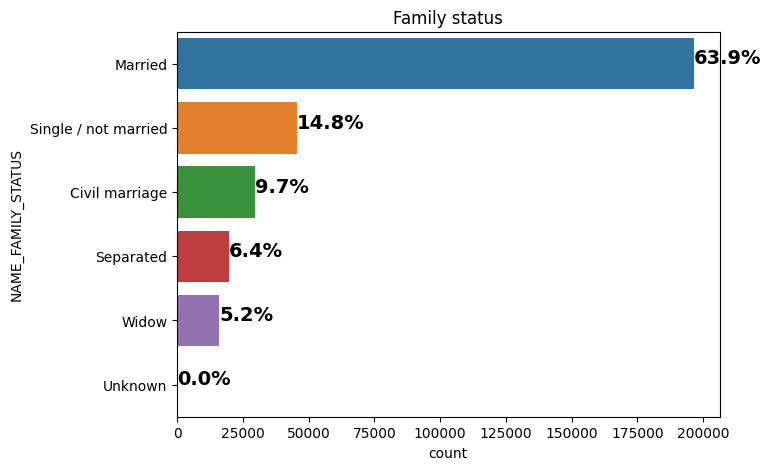

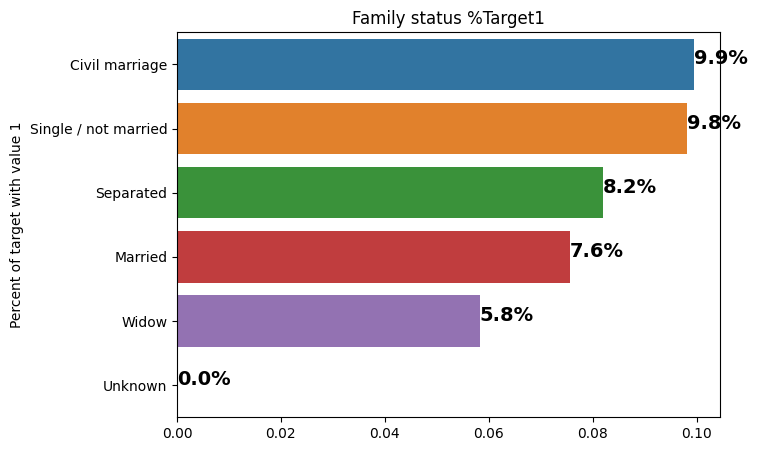

In [33]:
#NAME_FAMILY_STATUS
plot_stat(application_train, 'NAME_FAMILY_STATUS',"Family status")

plot_percent_target1(application_train, 'NAME_FAMILY_STATUS',"Family status %Target1")

La plupart des clients sont mariés, suivis des célibataires / non mariés et des mariages civils.

En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

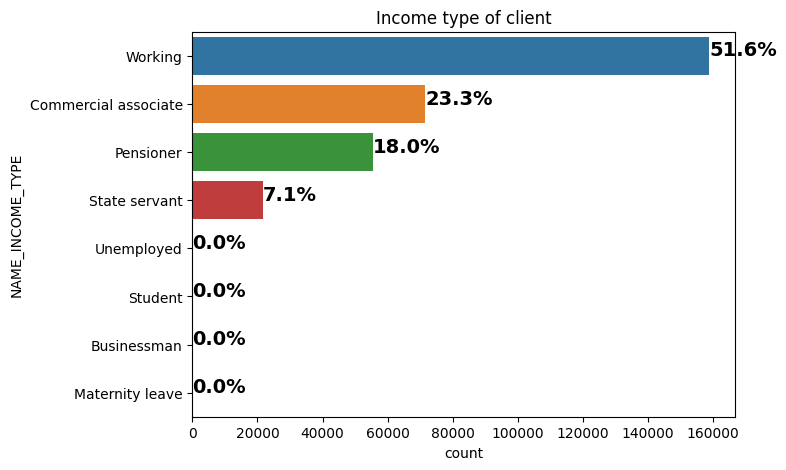

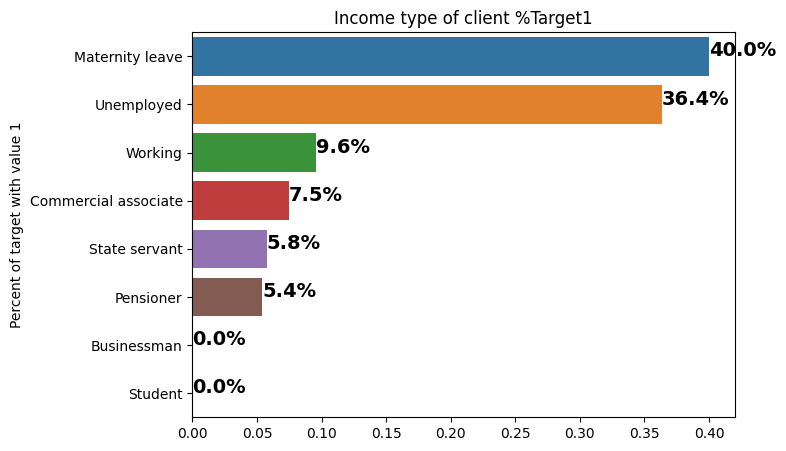

In [34]:
#NAME_INCOME_TYPE
plot_stat(application_train, 'NAME_INCOME_TYPE',"Income type of client")

plot_percent_target1(application_train, 'NAME_INCOME_TYPE',"Income type of client %Target1")

La plupart des demandeurs de prêts sont des revenus du travail, suivis par un associé commercial, un retraité et un fonctionnaire.

Les demandeurs avec le type de revenu Congé de maternité ont un ratio de près de 40% de prêts non remboursés, suivis des chômeurs (37%). Les autres types de revenus sont inférieurs à la moyenne de 10% pour ne pas rembourser les prêts.

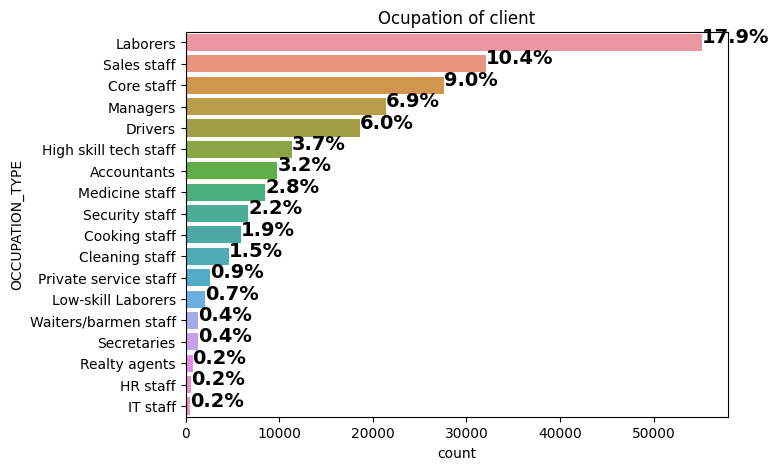

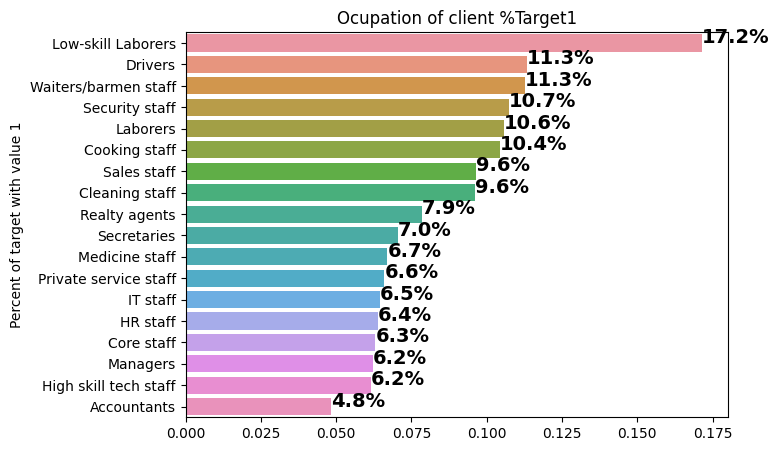

In [35]:
#OCCUPATION_TYPE
plot_stat(application_train, 'OCCUPATION_TYPE',"Ocupation of client")

plot_percent_target1(application_train, 'OCCUPATION_TYPE',"Ocupation of client %Target1")

La plupart des prêts sont contractés par des ouvriers, suivis par les vendeurs/commerciaux. Le personnel informatique prend le montant de prêts le plus bas.

La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

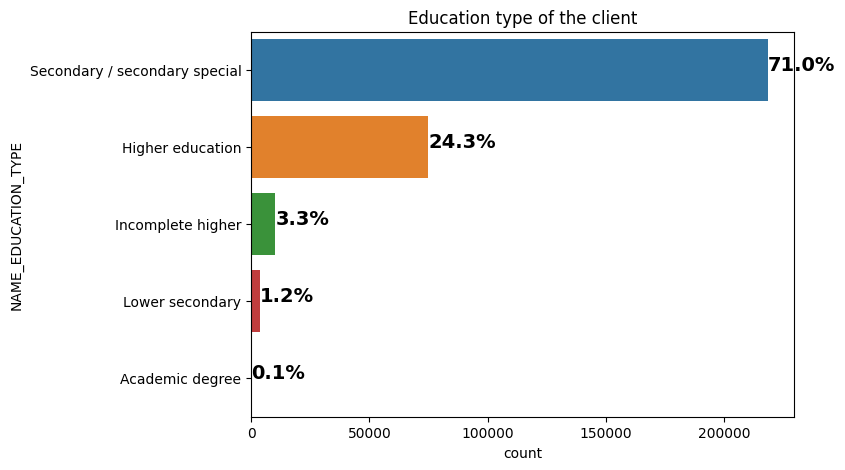

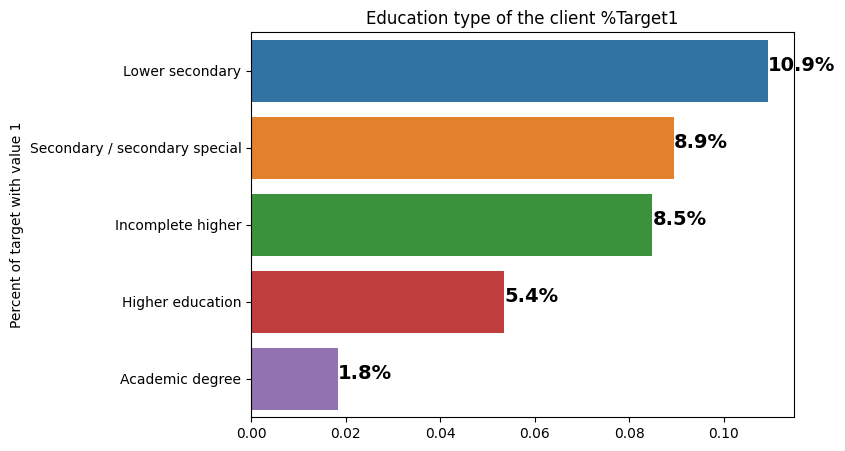

In [36]:
#NAME_EDUCATION_TYPE
plot_stat(application_train, 'NAME_EDUCATION_TYPE',"Education type of the client")

plot_percent_target1(application_train, 'NAME_EDUCATION_TYPE',"Education type of the client %Target1")

La majorité des clients ont une éducation dans l'éducation secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

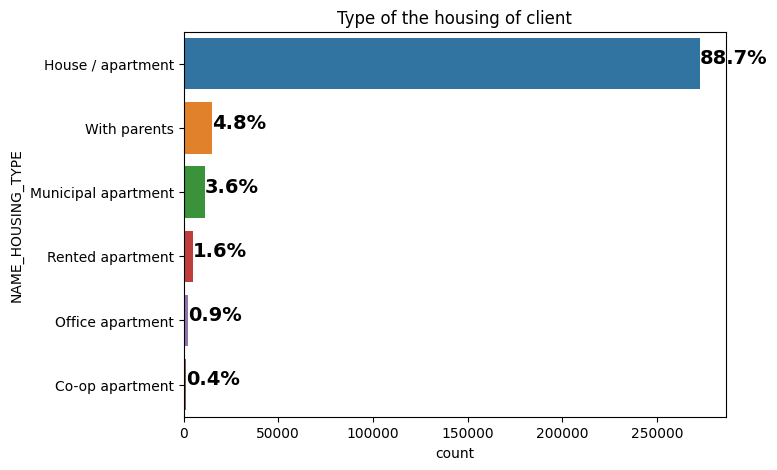

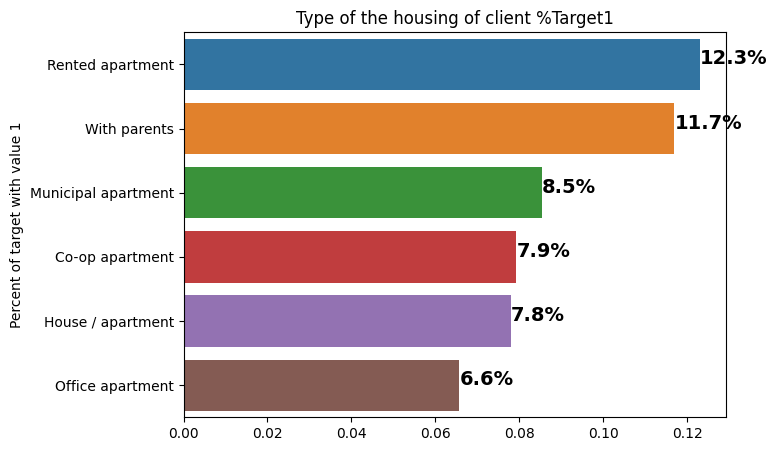

In [37]:
#NAME_HOUSING_TYPE
plot_stat(application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client")

plot_percent_target1(application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client %Target1")

Plus de 250 000 demandeurs de crédits vivent en maison ou appartement. Les catégories suivantes, faible pourcentage, représentent une population moins "indépendante" (vivre chez ses parents, etc…).

Dans ces catégories, les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.

### Corrélations
L'analyse peut continuer par une étape de traitement des corrélations entre les caractéristiques et la Target. L'idée est de calculer le coefficient de corrélation de Pearson entre chaque variable et la Target. Cette étape permet d'avoir un aperçu des relations possibles entre les variables.

In [38]:
#Display correlations
print('Most Positive Correlations:\n', application_train.corr()['TARGET'].sort_values().tail(15))

print('Most Negative Correlations:\n', application_train.corr()['TARGET'].sort_values().head(15))

ValueError: could not convert string to float: 'Cash loans'

Notons que la corrélation la plus forte est celle de la variable 'DAYS_BIRTH'. Ceci étant, pour faciliter la compréhension est retrouver la logique vue en préambule, les jours exprimés en valeurs négatives peuvent être traités en valeurs absolues. Alors le coef. de Person sera négatif, cela expose le fait qu'un client plus âgé sera moins susceptible de faire défaut au remboursement de son crédit (cela peut sembler logique, en tout cas ce n'est pas absurde).

In [39]:
#Find the correlation of the positive days since birth and target
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982709

En termes de distribution des âges elle peut uniquement servir à visualiser la non présence d'outliers, suite à ce qui a été fait en amont sur les valeurs négatives de départ. Pour visualiser l'effet de l'âge sur la Target, nous pouvons faire un graphique (KDE) coloré par la valeur TARGET 0 et 1.

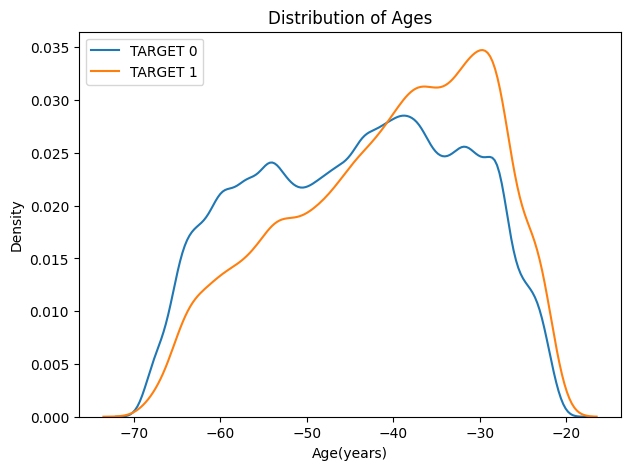

In [40]:
plt.figure(figsize = (7, 5))
sns.kdeplot(application_train[application_train['TARGET'] == 0]['DAYS_BIRTH'] / -365, label = 'TARGET 0')
sns.kdeplot(application_train[application_train['TARGET'] == 1]['DAYS_BIRTH'] / -365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
plt.show()

La courbe cible TARGET 1 s'incline vers l'extrémité la plus jeune de la plage. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient Pearson -0,07), cette variable sera probablement utile dans un modèle d'apprentissage car elle affecte la Target.

#### Sources extérieures, les plus fortes corrélations linéaires…
Ces 3 variables (EXT_SOURCE) présentant les corrélations négatives les plus fortes avec la Target. Selon la documentation, ces fonctionnalités représentent un «score normalisé à partir d'une source de données externe». 
Difficile de comprendre le sens exact, nous pouvons émettre l'hypothèse d'une cote de crédit cumulative établie à l'aide de différentes sources de données.

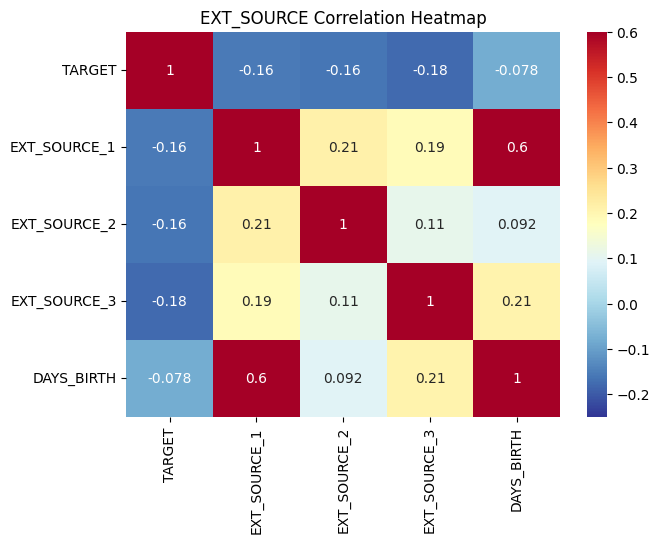

In [41]:
#Heatmap of correlations
plt.figure(figsize = (7, 5))
sns.heatmap(application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
plt.show()

Ces sources extérieures sont corrélées négativement avec la Target (Attention, négativement mais avec de très faibles coefficients). Malgré tout, on peut penser que si la valeur augmente, le client est plus susceptible de pouvoir rembourser le crédit. Notons que 'DAYS_BIRTH' est corrélée avec 'EXT_SOURCE_1', peut-être l'un des facteurs de ce score est l'âge du client.

In [42]:
#Plot distribution of one feature
def plot_distribution(feature, title):
    plt.figure(figsize = (7, 5))

    t0 = application_train.loc[application_train['TARGET'] == 0]
    t1 = application_train.loc[application_train['TARGET'] == 1]

    sns.kdeplot(t0[feature].dropna(), color = 'blue', label = "TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color = 'red', label = "TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    plt.show()

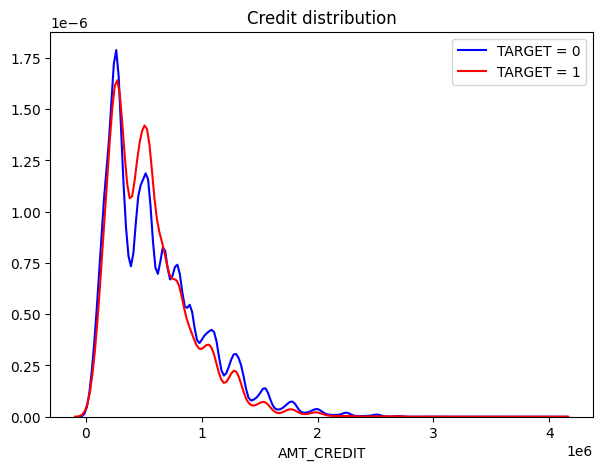

                                   -------------------------------------------------------


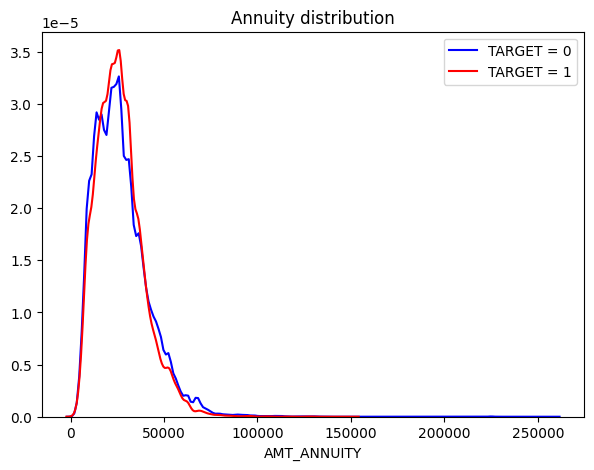

                                   -------------------------------------------------------


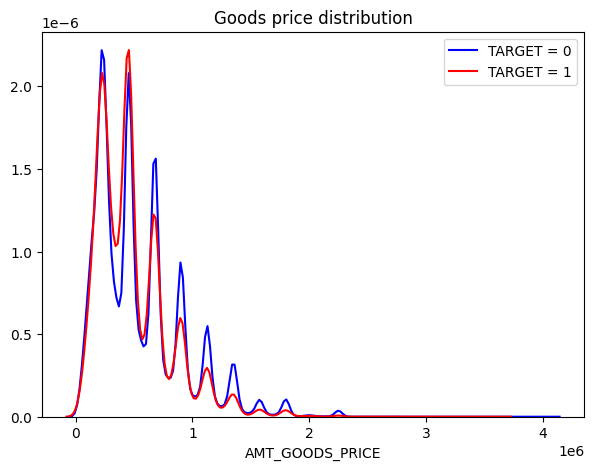

                                   -------------------------------------------------------


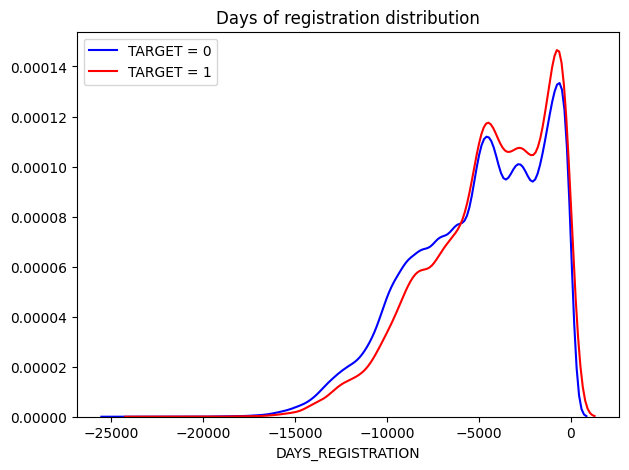

                                   -------------------------------------------------------


In [43]:
plot_distribution('AMT_CREDIT', "Credit distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")
print("                                   -------------------------------------------------------")

### EDA bureau.csv

``Bureau data``

Ce fichier contient tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au Bureau de crédit (pour les clients qui ont un prêt dans l'échantillon). Pour chaque prêt de l'échantillon, il y a autant de lignes que de nombre de crédits que le client avait au bureau de crédit avant la date de la demande. SK_ID_CURR est la clé reliant les données application_train | test aux données du bureau.

Il est nécessaire de fusionner "application_train" avec "bureau" pour pour pouvoir extraire la part de TARGET == 1.

In [44]:
application_bureau_train = application_train.merge(bureau, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'left')

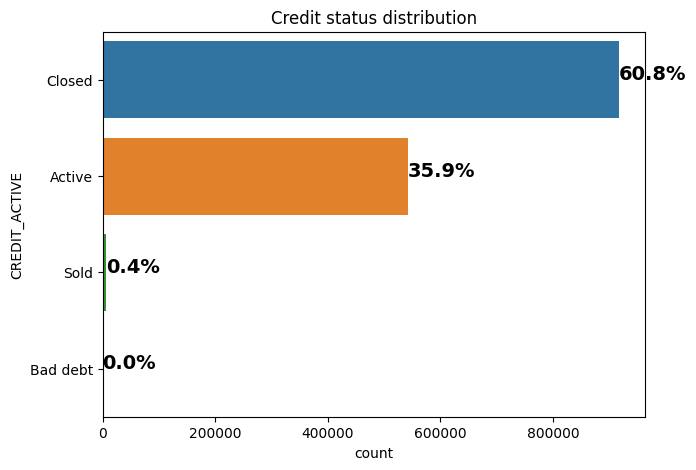

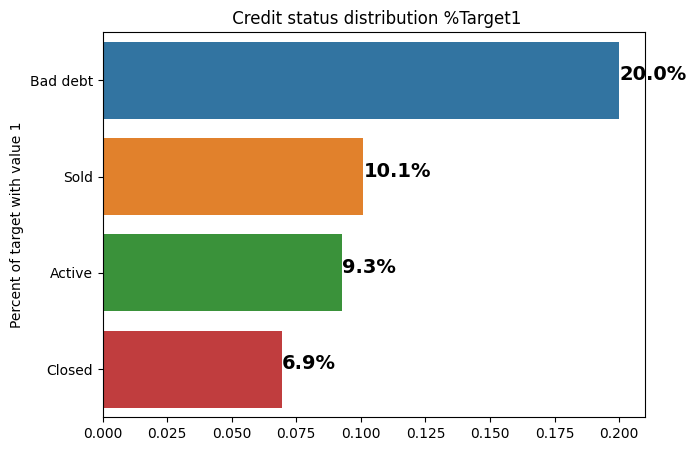

In [45]:
#CREDIT_ACTIVE
plot_stat(application_bureau_train, 'CREDIT_ACTIVE', "Credit status distribution")

plot_percent_target1(application_bureau_train, 'CREDIT_ACTIVE'," Credit status distribution %Target1")

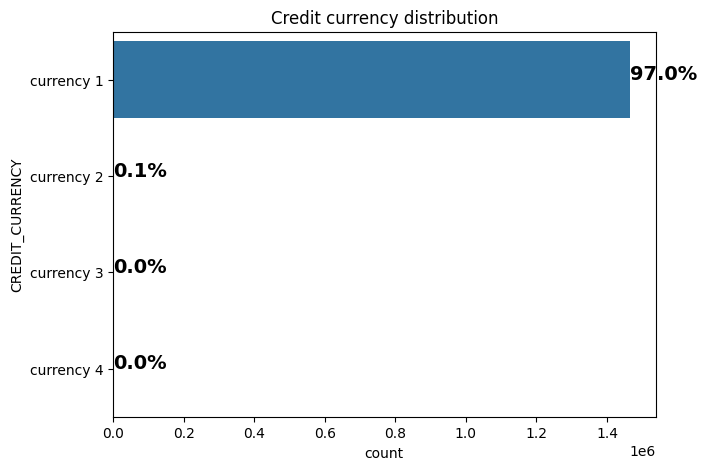

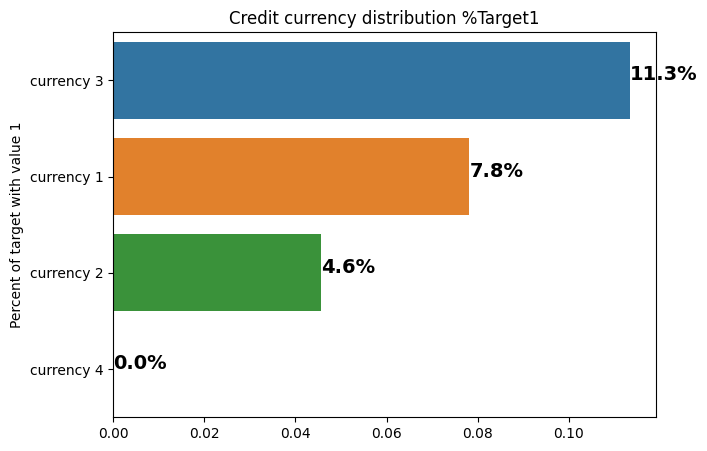

In [46]:
#CREDIT_CURRENCY
plot_stat(application_bureau_train, 'CREDIT_CURRENCY', "Credit currency distribution")

plot_percent_target1(application_bureau_train, 'CREDIT_CURRENCY', "Credit currency distribution %Target1")

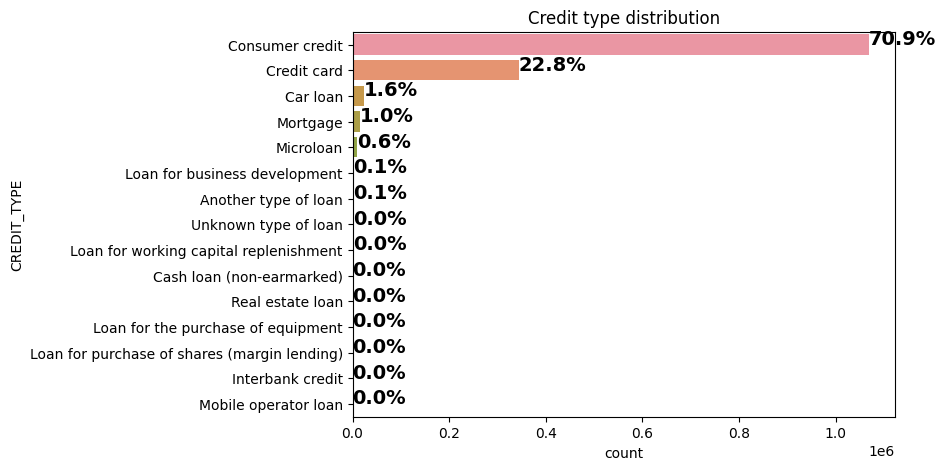

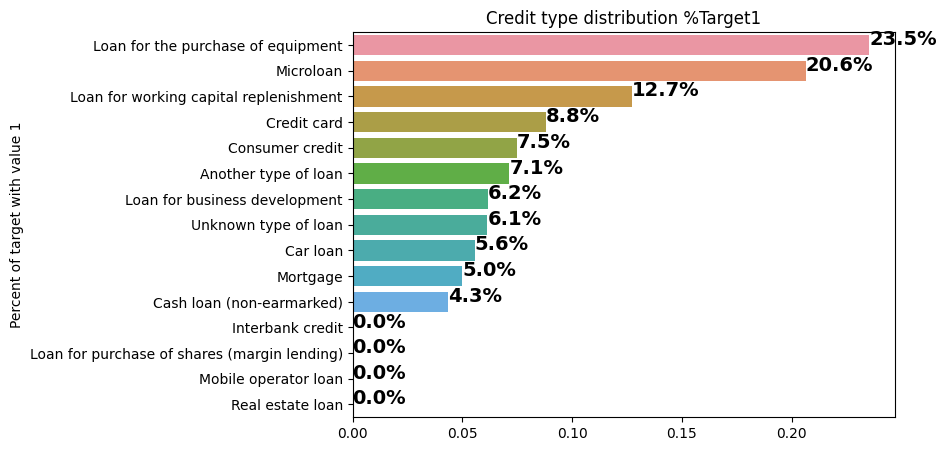

In [47]:
#CREDIT_TYPE
plot_stat(application_bureau_train, 'CREDIT_TYPE', "Credit type distribution")

plot_percent_target1(application_bureau_train, 'CREDIT_TYPE', "Credit type distribution %Target1")

### EDA previous_application.csv

``Previous application data``

"previous_application" contient des informations sur toutes les demandes précédentes de crédit immobilier des clients qui ont des prêts dans l'échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données. SK_ID_CURR est la clé reliant les données application_train | test aux données previous_application.


Il est nécessaire de fusionner "application_train" avec "previous_application" pour pour pouvoir extraire la part de TARGET == 1.

In [48]:
application_prev_train = application_train.merge(previous_application, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'left')

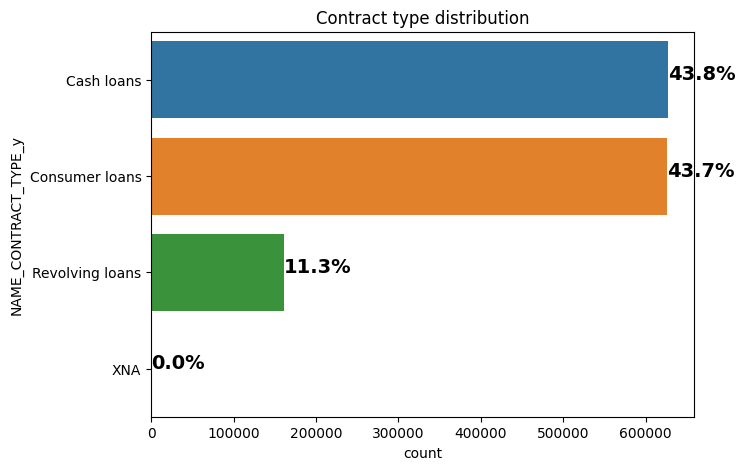

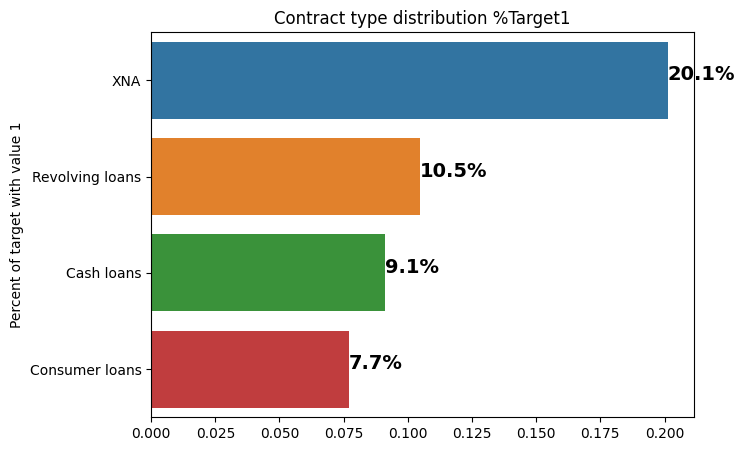

In [49]:
#NAME_CONTRACT_TYPE_y
plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution")

plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution %Target1")

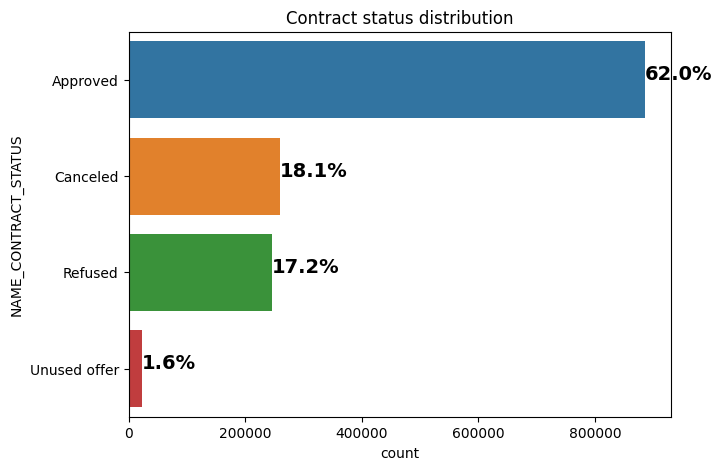

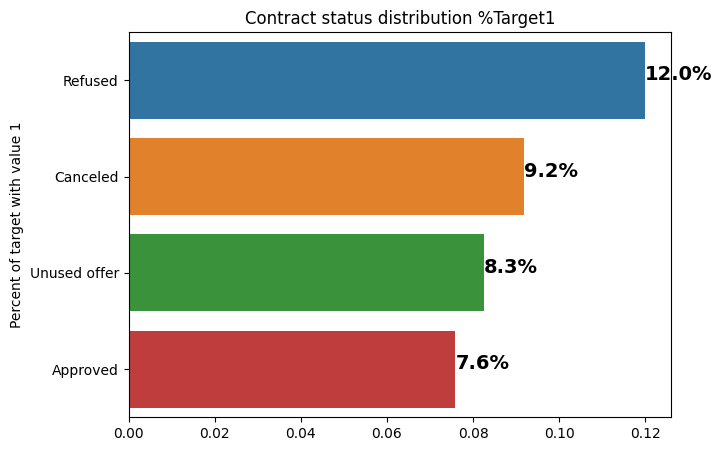

In [50]:
#NAME_CONTRACT_STATUS
plot_stat(application_prev_train, 'NAME_CONTRACT_STATUS', "Contract status distribution")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_STATUS', "Contract status distribution %Target1")

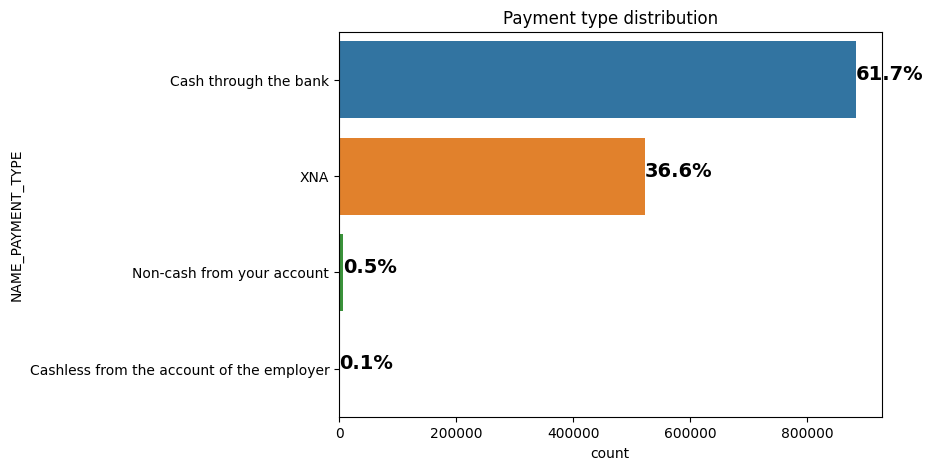

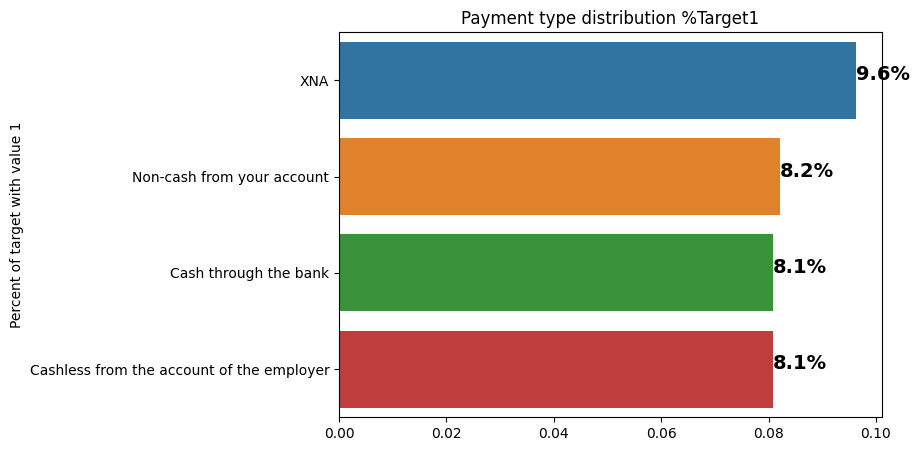

In [51]:
#NAME_PAYMENT_TYPE
plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE', "Payment type distribution")
plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE', "Payment type distribution %Target1")

Le mode de paiement se fait majoritairement en Cash via la banque. Le remboursement du crédit en cas de défaillance (Target 1) ne se dintingue sur aucun type de paiement, l'égalité est quasi parfaite.

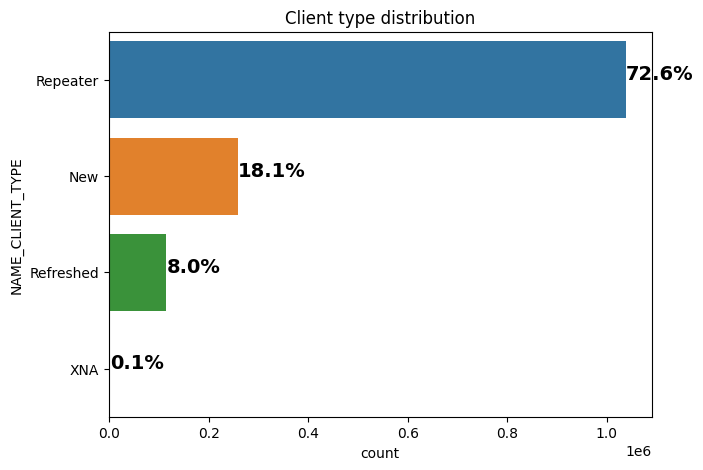

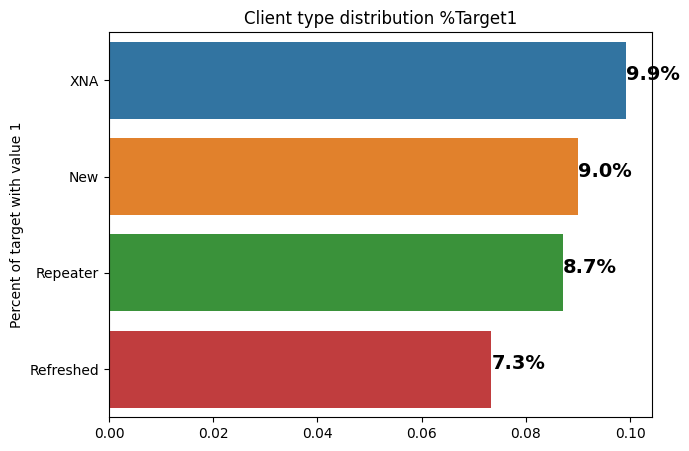

In [52]:
#NAME_CLIENT_TYPE
plot_stat(application_prev_train, 'NAME_CLIENT_TYPE', "Client type distribution")

plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE', "Client type distribution %Target1")

## Merging et agrégations des données
Indispensable d'avoir une réflexion et une étape d'agrégation des données. Des informations complémentaires aux principaux fichiers peuvent en effet avoir un impact dans nos modélisations. Voyons comment traiter l'ensemble des jeux de données…

In [53]:
#Create a simple dataset with the train / test merge app
data = pd.merge(application_train, application_test, on = 'SK_ID_CURR', how = 'left')
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER_x,FLAG_OWN_CAR_x,FLAG_OWN_REALTY_x,CNT_CHILDREN_x,AMT_INCOME_TOTAL_x,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE_x,NAME_EDUCATION_TYPE_x,NAME_FAMILY_STATUS_x,NAME_HOUSING_TYPE_x,REGION_POPULATION_RELATIVE_x,DAYS_BIRTH_x,DAYS_EMPLOYED_x,DAYS_REGISTRATION_x,DAYS_ID_PUBLISH_x,OWN_CAR_AGE_x,FLAG_MOBIL_x,FLAG_EMP_PHONE_x,FLAG_WORK_PHONE_x,FLAG_CONT_MOBILE_x,FLAG_PHONE_x,FLAG_EMAIL_x,OCCUPATION_TYPE_x,CNT_FAM_MEMBERS_x,REGION_RATING_CLIENT_x,REGION_RATING_CLIENT_W_CITY_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION_x,REG_REGION_NOT_WORK_REGION_x,LIVE_REGION_NOT_WORK_REGION_x,REG_CITY_NOT_LIVE_CITY_x,REG_CITY_NOT_WORK_CITY_x,LIVE_CITY_NOT_WORK_CITY_x,ORGANIZATION_TYPE_x,EXT_SOURCE_1_x,EXT_SOURCE_2_x,EXT_SOURCE_3_x,APARTMENTS_AVG_x,BASEMENTAREA_AVG_x,YEARS_BEGINEXPLUATATION_AVG_x,YEARS_BUILD_AVG_x,COMMONAREA_AVG_x,ELEVATORS_AVG_x,...,APARTMENTS_MEDI_y,BASEMENTAREA_MEDI_y,YEARS_BEGINEXPLUATATION_MEDI_y,YEARS_BUILD_MEDI_y,COMMONAREA_MEDI_y,ELEVATORS_MEDI_y,ENTRANCES_MEDI_y,FLOORSMAX_MEDI_y,FLOORSMIN_MEDI_y,LANDAREA_MEDI_y,LIVINGAPARTMENTS_MEDI_y,LIVINGAREA_MEDI_y,NONLIVINGAPARTMENTS_MEDI_y,NONLIVINGAREA_MEDI_y,FONDKAPREMONT_MODE_y,HOUSETYPE_MODE_y,TOTALAREA_MODE_y,WALLSMATERIAL_MODE_y,EMERGENCYSTATE_MODE_y,OBS_30_CNT_SOCIAL_CIRCLE_y,DEF_30_CNT_SOCIAL_CIRCLE_y,OBS_60_CNT_SOCIAL_CIRCLE_y,DEF_60_CNT_SOCIAL_CIRCLE_y,DAYS_LAST_PHONE_CHANGE_y,FLAG_DOCUMENT_2_y,FLAG_DOCUMENT_3_y,FLAG_DOCUMENT_4_y,FLAG_DOCUMENT_5_y,FLAG_DOCUMENT_6_y,FLAG_DOCUMENT_7_y,FLAG_DOCUMENT_8_y,FLAG_DOCUMENT_9_y,FLAG_DOCUMENT_10_y,FLAG_DOCUMENT_11_y,FLAG_DOCUMENT_12_y,FLAG_DOCUMENT_13_y,FLAG_DOCUMENT_14_y,FLAG_DOCUMENT_15_y,FLAG_DOCUMENT_16_y,FLAG_DOCUMENT_17_y,FLAG_DOCUMENT_18_y,FLAG_DOCUMENT_19_y,FLAG_DOCUMENT_20_y,FLAG_DOCUMENT_21_y,AMT_REQ_CREDIT_BUREAU_HOUR_y,AMT_REQ_CREDIT_BUREAU_DAY_y,AMT_REQ_CREDIT_BUREAU_WEEK_y,AMT_REQ_CREDIT_BUREAU_MON_y,AMT_REQ_CREDIT_BUREAU_QRT_y,AMT_REQ_CREDIT_BUREAU_YEAR_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039.0,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Les deux jeux de données ont exactement le même format avec une seule différence, la TARGET dispo dans le train.

In [54]:
print('Train:' + str(application_train.shape))
print('Test:' + str(application_test.shape))
print('>>> Data:' + str(data.shape))

Train:(307511, 123)
Test:(48744, 121)
>>> Data:(307511, 243)


In [55]:
#Now just in case, let's check if we've got it right
data.TARGET.isna().sum()

0

A partir du fichier ``bureau.csv``, il est possible d'extraire un historique sur les précédents crédits enregistrés par les clients. Il peut donc être intéressant d'enrichir l'échantillon avec ce type de données.

``bureau : bureau.csv``

In [56]:
display(bureau.head())
display(bureau.shape)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


(1716428, 17)

Calcul du nombre total des précédents crédits pris par chaque client. Ce type d'information viendra enrichir l'échantillon de travail… 

In [57]:
#Total number of previous credits taken by each customer
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
                                       columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

,SK_ID_CURR,PREVIOUS_LOANS_COUNT
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [58]:
#Merge this new column in our data sample
data = data.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
data.shape

(307511, 244)

``bureau_balance : bureau_balance.csv``

In [59]:
display(bureau_balance.head())
display(bureau_balance.shape)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


(27299925, 3)

In [60]:
#Monthly average balances of previous credits in Credit Bureau.
bureau_bal_mean = bureau_balance.groupby('SK_ID_BUREAU', as_index = False).agg({'MONTHS_BALANCE' : 'mean', 'STATUS' : 'first'}).rename(columns = {'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'})
bureau_bal_mean.head()

,SK_ID_BUREAU,MONTHS_BALANCE_MEAN,STATUS
0,5001709,-48.0,C
1,5001710,-41.0,C
2,5001711,-1.5,X
3,5001712,-9.0,C
4,5001713,-10.5,X


In [61]:
bureau_full = bureau.merge(bureau_bal_mean, on = 'SK_ID_BUREAU', how = 'inner')
bureau_full.drop('SK_ID_BUREAU', axis = 1, inplace = True)
display(bureau_full.head())
display(bureau_full.shape)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_MEAN,STATUS
0,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-13.0,C
1,380361,Active,currency 1,-357,0,1119.0,NaN,NaN,0,45000.0,0.0,45000.0,0.0,Credit card,-130,2691.0,-5.5,C
2,380361,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0,-17.5,C
3,380361,Closed,currency 1,-993,0,31039.0,-831.0,NaN,0,315000.0,0.0,0.0,0.0,Credit card,-818,0.0,-16.0,C
4,380361,Closed,currency 1,-1146,0,681.0,-780.0,NaN,0,2025000.0,0.0,0.0,0.0,Consumer credit,-769,0.0,-18.5,C


(774354, 18)

In [62]:
bureau_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774354 entries, 0 to 774353
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              774354 non-null  int64  
 1   CREDIT_ACTIVE           774354 non-null  object 
 2   CREDIT_CURRENCY         774354 non-null  object 
 3   DAYS_CREDIT             774354 non-null  int64  
 4   CREDIT_DAY_OVERDUE      774354 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     723869 non-null  float64
 6   DAYS_ENDDATE_FACT       490889 non-null  float64
 7   AMT_CREDIT_MAX_OVERDUE  234704 non-null  float64
 8   CNT_CREDIT_PROLONG      774354 non-null  int64  
 9   AMT_CREDIT_SUM          774349 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     662000 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    477791 non-null  float64
 12  AMT_CREDIT_SUM_OVERDUE  774354 non-null  float64
 13  CREDIT_TYPE             774354 non-null  object 
 14  DAYS_CREDIT_UPDATE  

In [63]:
bureau_full.columns

Index(['SK_ID_CURR', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY',
       'MONTHS_BALANCE_MEAN', 'STATUS'],
      dtype='object')

In [64]:
bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index = False).agg({
    'CREDIT_ACTIVE' : 'first',
    'CREDIT_CURRENCY': 'first',
    'DAYS_CREDIT' : 'mean',
    'CREDIT_DAY_OVERDUE' : 'mean',
    'DAYS_CREDIT_ENDDATE' : 'mean',
    'DAYS_ENDDATE_FACT' : 'mean',
    'AMT_CREDIT_MAX_OVERDUE' : 'mean',
    'CNT_CREDIT_PROLONG' : 'mean',
    'AMT_CREDIT_SUM' : 'mean',
    'AMT_CREDIT_SUM_DEBT' : 'mean',
    'AMT_CREDIT_SUM_LIMIT' : 'mean',
    'AMT_CREDIT_SUM_OVERDUE' : 'mean',
    'CREDIT_TYPE' : 'first',
    'DAYS_CREDIT_UPDATE' : 'mean',
    'AMT_ANNUITY' : 'mean',
    'MONTHS_BALANCE_MEAN' : 'mean',
    'STATUS' : 'first'
    }).add_prefix('PREV_BUR_MEAN_')
bureau_mean = bureau_mean.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
bureau_mean.shape

(134542, 18)

In [65]:
#Merge all this features with our data sample
data = data.merge(bureau_mean, on = 'SK_ID_CURR', how = 'left')
data.shape

(307511, 261)

Notons l'enrichissement avec 13 nouvelles features, créées et ajoutées à notre ensemble de données application train/test appelé ``data``.

``previous_application``

Vérification des valeurs de 'SK_ID_CURR' entre data et previous_application…

In [66]:
display(previous_application.head())
display(previous_application.shape)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


(1670214, 37)

In [67]:
#Check 
len(previous_application.SK_ID_CURR.isin(data.SK_ID_CURR)) == len(previous_application)

True

Comme précédemment, commençons par quantifier le nombre de demandes précédentes des clients au crédit immobilier et ajoutons cette données à l'échantillon.

In [68]:
#Number of previous applications of the clients to Home Credit
previous_application_counts = previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

,SK_ID_CURR,PREVIOUS_APPLICATION_COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [69]:
#Merge this new column in our data sample
data = data.merge(previous_application_counts, on = 'SK_ID_CURR', how = 'left')
data.shape

(307511, 262)

``credit_card_balance``

In [70]:
display(credit_card_balance.head())
display(credit_card_balance.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


(3840312, 23)

In [71]:
credit_card_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [72]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     int64  
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECIVABLE               float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    float64
 15  CNT_DRAWINGS_CURRENT        int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  float64
 17  CNT_DRAWINGS_POS_CURRENT    float64
 18  CNT_INSTALMENT_MATURE_CUM   float64
 19  NAME_CONTRACT_STATUS 

In [73]:
credit_card_balance.columns

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [74]:
credit_card_balance_mean = credit_card_balance.groupby('SK_ID_PREV', as_index = False).agg({
    'MONTHS_BALANCE' : 'mean',
    'AMT_BALANCE' : 'mean',
    'AMT_CREDIT_LIMIT_ACTUAL' : 'mean',
    'AMT_DRAWINGS_ATM_CURRENT' : 'mean',
    'AMT_DRAWINGS_CURRENT' : 'mean',
    'AMT_DRAWINGS_OTHER_CURRENT' : 'mean',
    'AMT_DRAWINGS_POS_CURRENT' : 'mean',
    'AMT_INST_MIN_REGULARITY' : 'mean',
    'AMT_PAYMENT_CURRENT' : 'mean',
    'AMT_PAYMENT_TOTAL_CURRENT' : 'mean',
    'AMT_RECEIVABLE_PRINCIPAL' : 'mean',
    'AMT_RECIVABLE' : 'mean',
    'AMT_TOTAL_RECEIVABLE' : 'mean',
    'CNT_DRAWINGS_ATM_CURRENT' : 'mean',
    'CNT_DRAWINGS_CURRENT' : 'mean',
    'CNT_DRAWINGS_OTHER_CURRENT' : 'mean',
    'CNT_DRAWINGS_POS_CURRENT' : 'mean',
    'CNT_INSTALMENT_MATURE_CUM' : 'mean',
    'NAME_CONTRACT_STATUS' : 'first',
    'SK_DPD' : 'mean',
    'SK_DPD_DEF' : 'mean'
}).add_prefix('CARD_MEAN_')
credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
credit_card_balance_mean.shape

(104307, 22)

In [75]:
#Merge with previous_application
previous_application = previous_application.merge(credit_card_balance_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 58)

``installments_payments``

In [76]:
display(installments_payments.head())
display(installments_payments.shape)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


(13605401, 8)

In [77]:
installments_payments.drop('SK_ID_CURR', axis = 1, inplace = True)

In [78]:
install_pay_mean = installments_payments.groupby('SK_ID_PREV', as_index = False).mean().add_prefix('INSTALL_MEAN_')
install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
install_pay_mean.shape

(997752, 7)

In [79]:
#Merge with previous_application
previous_application = previous_application.merge(install_pay_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 64)

``POS_CASH_balance``

In [80]:
display(POS_CASH_balance.head())
display(POS_CASH_balance.shape)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


(10001358, 8)

In [81]:
POS_CASH_balance.drop('SK_ID_CURR', axis = 1, inplace = True)

In [82]:
POS_mean = installments_payments.groupby('SK_ID_PREV', as_index = False).mean().add_prefix('POS_MEAN_')
POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
POS_mean.shape

(997752, 7)

In [83]:
#Merge with previous_application
previous_application = previous_application.merge(POS_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 70)

``previous_application``

Retour sur ``previous_application`` pour assembles les lignes d'observation selon 'SK_ID_CURR'.

In [84]:
display(previous_application.head())
display(previous_application.shape)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CARD_MEAN_MONTHS_BALANCE,CARD_MEAN_AMT_BALANCE,CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,CARD_MEAN_AMT_DRAWINGS_CURRENT,CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,CARD_MEAN_AMT_INST_MIN_REGULARITY,CARD_MEAN_AMT_PAYMENT_CURRENT,CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,CARD_MEAN_AMT_RECIVABLE,CARD_MEAN_AMT_TOTAL_RECEIVABLE,CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,CARD_MEAN_CNT_DRAWINGS_CURRENT,CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,CARD_MEAN_NAME_CONTRACT_STATUS,CARD_MEAN_SK_DPD,CARD_MEAN_SK_DPD_DEF,INSTALL_MEAN_NUM_INSTALMENT_VERSION,INSTALL_MEAN_NUM_INSTALMENT_NUMBER,INSTALL_MEAN_DAYS_INSTALMENT,INSTALL_MEAN_DAYS_ENTRY_PAYMENT,INSTALL_MEAN_AMT_INSTALMENT,INSTALL_MEAN_AMT_PAYMENT,POS_MEAN_NUM_INSTALMENT_VERSION,POS_MEAN_NUM_INSTALMENT_NUMBER,POS_MEAN_DAYS_INSTALMENT,POS_MEAN_DAYS_ENTRY_PAYMENT,POS_MEAN_AMT_INSTALMENT,POS_MEAN_AMT_PAYMENT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.0,-42.0,-42.000000,17284.275000,17284.275000,2.000000,1.0,-42.0,-42.000000,17284.275000,17284.275000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.0,-74.0,-83.200000,25188.615000,25188.615000,1.000000,3.0,-74.0,-83.200000,25188.615000,25188.615000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.0,-151.0,-159.222222,15060.735000,15060.735000,1.000000,5.0,-151.0,-159.222222,15060.735000,15060.735000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.090909,6.0,-332.0,-339.090909,51193.943182,51193.943182,1.090909,6.0,-332.0,-339.090909,51193.943182,51193.943182
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(1670214, 70)

In [85]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'CARD_MEAN_MONTHS_BALANCE', 'CARD_MEAN_AMT_BALANCE',
       'CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL',
       'CARD_MEA

In [86]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 70 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   SK_ID_PREV                            1670214 non-null  int64  
 1   SK_ID_CURR                            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE                    1670214 non-null  object 
 3   AMT_ANNUITY                           1297979 non-null  float64
 4   AMT_APPLICATION                       1670214 non-null  float64
 5   AMT_CREDIT                            1670213 non-null  float64
 6   AMT_DOWN_PAYMENT                      774370 non-null   float64
 7   AMT_GOODS_PRICE                       1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START            1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START               1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT           1670214 non-null

In [87]:
prev_appl_mean = previous_application.groupby('SK_ID_CURR', as_index = False).agg({
    'SK_ID_PREV' : 'mean',
    'SK_ID_CURR' : 'mean',
    'NAME_CONTRACT_TYPE' : 'first',
    'AMT_ANNUITY' : 'mean',
    'AMT_APPLICATION' : 'mean', 'AMT_CREDIT' : 'mean', 'AMT_DOWN_PAYMENT' : 'mean', 'AMT_GOODS_PRICE' : 'mean',
    'WEEKDAY_APPR_PROCESS_START' : 'first', 'HOUR_APPR_PROCESS_START' : 'mean',
    'FLAG_LAST_APPL_PER_CONTRACT' : 'first', 'NFLAG_LAST_APPL_IN_DAY' : 'mean',
    'RATE_DOWN_PAYMENT' : 'mean', 'RATE_INTEREST_PRIMARY' : 'mean',
    'RATE_INTEREST_PRIVILEGED' : 'mean', 'NAME_CASH_LOAN_PURPOSE' : 'first',
    'NAME_CONTRACT_STATUS' : 'first', 'DAYS_DECISION' : 'mean', 'NAME_PAYMENT_TYPE' : 'first',
    'CODE_REJECT_REASON' : 'first', 'NAME_TYPE_SUITE' : 'first', 'NAME_CLIENT_TYPE' : 'first',
    'NAME_GOODS_CATEGORY' : 'first', 'NAME_PORTFOLIO' : 'first', 'NAME_PRODUCT_TYPE' : 'first',
    'CHANNEL_TYPE' : 'first', 'SELLERPLACE_AREA' : 'mean', 'NAME_SELLER_INDUSTRY' : 'first',
       'CNT_PAYMENT' : 'mean', 'NAME_YIELD_GROUP' : 'first', 'PRODUCT_COMBINATION' : 'first',
       'DAYS_FIRST_DRAWING' : 'mean', 'DAYS_FIRST_DUE' : 'mean', 'DAYS_LAST_DUE_1ST_VERSION' : 'mean',
       'DAYS_LAST_DUE' : 'mean', 'DAYS_TERMINATION' : 'mean', 'NFLAG_INSURED_ON_APPROVAL' : 'mean',
       'CARD_MEAN_MONTHS_BALANCE' : 'mean', 'CARD_MEAN_AMT_BALANCE' : 'mean',
       'CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT' : 'mean', 'CARD_MEAN_AMT_DRAWINGS_CURRENT' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_POS_CURRENT' : 'mean',
       'CARD_MEAN_AMT_INST_MIN_REGULARITY' : 'mean', 'CARD_MEAN_AMT_PAYMENT_CURRENT' : 'mean',
       'CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT' : 'mean',
       'CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL' : 'mean', 'CARD_MEAN_AMT_RECIVABLE' : 'mean',
       'CARD_MEAN_AMT_TOTAL_RECEIVABLE' : 'mean', 'CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_POS_CURRENT' : 'mean',
       'CARD_MEAN_CNT_INSTALMENT_MATURE_CUM' : 'mean', 'CARD_MEAN_NAME_CONTRACT_STATUS' : 'first',
       'CARD_MEAN_SK_DPD' : 'mean', 'CARD_MEAN_SK_DPD_DEF' : 'mean',
       'INSTALL_MEAN_NUM_INSTALMENT_VERSION' : 'mean',
       'INSTALL_MEAN_NUM_INSTALMENT_NUMBER' : 'mean', 'INSTALL_MEAN_DAYS_INSTALMENT' : 'mean',
       'INSTALL_MEAN_DAYS_ENTRY_PAYMENT' : 'mean', 'INSTALL_MEAN_AMT_INSTALMENT' : 'mean',
       'INSTALL_MEAN_AMT_PAYMENT' : 'mean', 'POS_MEAN_NUM_INSTALMENT_VERSION' : 'mean',
       'POS_MEAN_NUM_INSTALMENT_NUMBER' : 'mean', 'POS_MEAN_DAYS_INSTALMENT' : 'mean',
       'POS_MEAN_DAYS_ENTRY_PAYMENT' : 'mean', 'POS_MEAN_AMT_INSTALMENT' : 'mean',
       'POS_MEAN_AMT_PAYMENT' : 'mean'
}).add_prefix('PREV_APPL_MEAN_')

In [88]:
prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace = True)
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis = 1)

In [89]:
display(prev_appl_mean.head())
display(prev_appl_mean.shape)

,SK_ID_CURR,PREV_APPL_MEAN_NAME_CONTRACT_TYPE,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_APPLICATION,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_AMT_GOODS_PRICE,PREV_APPL_MEAN_WEEKDAY_APPR_PROCESS_START,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_FLAG_LAST_APPL_PER_CONTRACT,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_RATE_INTEREST_PRIMARY,PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED,PREV_APPL_MEAN_NAME_CASH_LOAN_PURPOSE,PREV_APPL_MEAN_NAME_CONTRACT_STATUS,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_NAME_PAYMENT_TYPE,PREV_APPL_MEAN_CODE_REJECT_REASON,PREV_APPL_MEAN_NAME_TYPE_SUITE,PREV_APPL_MEAN_NAME_CLIENT_TYPE,PREV_APPL_MEAN_NAME_GOODS_CATEGORY,PREV_APPL_MEAN_NAME_PORTFOLIO,PREV_APPL_MEAN_NAME_PRODUCT_TYPE,PREV_APPL_MEAN_CHANNEL_TYPE,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_NAME_SELLER_INDUSTRY,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_NAME_YIELD_GROUP,PREV_APPL_MEAN_PRODUCT_COMBINATION,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_NAME_CONTRACT_STATUS,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT
0,100001.0,Consumer loans,3951.000,24835.50,23787.00,2520.0,24835.5,FRIDAY,13.000000,Y,1.0,0.104326,NaN,NaN,XAP,Approved,-1740.0,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23.0,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000
1,100002.0,Consumer loans,9251.775,179055.00,179055.00,0.0,179055.0,SATURDAY,9.000000,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,None,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003.0,Cash loans,56553.990,435436.50,484191.00,3442.5,435436.5,FRIDAY,14.666667,Y,1.0,0.050030,NaN,NaN,XNA,Approved,-1305.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,533.0,XNA,10.0,low_normal,Cash X-Sell: low,365243.0,-1

(338857, 69)

In [90]:
#Reminder…
print('data shape', data.shape)

data shape (307511, 262)


In [91]:
#Last merge with our data sample
data = data.merge(prev_appl_mean, on = 'SK_ID_CURR', how = 'inner')
#data.set_index('SK_ID_CURR', inplace=True)
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER_x,FLAG_OWN_CAR_x,FLAG_OWN_REALTY_x,CNT_CHILDREN_x,AMT_INCOME_TOTAL_x,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE_x,NAME_EDUCATION_TYPE_x,NAME_FAMILY_STATUS_x,NAME_HOUSING_TYPE_x,REGION_POPULATION_RELATIVE_x,DAYS_BIRTH_x,DAYS_EMPLOYED_x,DAYS_REGISTRATION_x,DAYS_ID_PUBLISH_x,OWN_CAR_AGE_x,FLAG_MOBIL_x,FLAG_EMP_PHONE_x,FLAG_WORK_PHONE_x,FLAG_CONT_MOBILE_x,FLAG_PHONE_x,FLAG_EMAIL_x,OCCUPATION_TYPE_x,CNT_FAM_MEMBERS_x,REGION_RATING_CLIENT_x,REGION_RATING_CLIENT_W_CITY_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION_x,REG_REGION_NOT_WORK_REGION_x,LIVE_REGION_NOT_WORK_REGION_x,REG_CITY_NOT_LIVE_CITY_x,REG_CITY_NOT_WORK_CITY_x,LIVE_CITY_NOT_WORK_CITY_x,ORGANIZATION_TYPE_x,EXT_SOURCE_1_x,EXT_SOURCE_2_x,EXT_SOURCE_3_x,APARTMENTS_AVG_x,BASEMENTAREA_AVG_x,YEARS_BEGINEXPLUATATION_AVG_x,YEARS_BUILD_AVG_x,COMMONAREA_AVG_x,ELEVATORS_AVG_x,...,PREV_APPL_MEAN_NAME_TYPE_SUITE,PREV_APPL_MEAN_NAME_CLIENT_TYPE,PREV_APPL_MEAN_NAME_GOODS_CATEGORY,PREV_APPL_MEAN_NAME_PORTFOLIO,PREV_APPL_MEAN_NAME_PRODUCT_TYPE,PREV_APPL_MEAN_CHANNEL_TYPE,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_NAME_SELLER_INDUSTRY,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_NAME_YIELD_GROUP,PREV_APPL_MEAN_PRODUCT_COMBINATION,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_NAME_CONTRACT_STATUS,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,None,New,Vehicles,POS,XNA,Stone,500.000000,Auto technology,24.000000,low_normal,POS other with interest,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,

(291057, 330)

***50 nouvelles features ont été ajoutées à l'échantillon suite aux opérations de merging.***

## Features engineering
Il peut être pertinent d'enrichir l'échantillon par un ajout de variables spécifiques à la problématique métier. N'étant pas spécialisé dans l'expertise des crédits, on pourra mener les modélisations avec une étape de features selection qui déterminera la pertinence de ces variables, ainsi que toutes les autres variables de l'échantillon.

### 3 features extraites des précédentes étapes
Pour rappel, les étapes précédentes consistaient uniquement à établir des liens entre nos fichiers, des fusions de table dans le but d'enrichir l'échantillon de travail. Ceci étant, avant de procéder au merging des éléments, on a pu facilement extraire __3 variables de moyenne et de comptage__.

``PREVIOUS_LOANS_COUNT`` from bureau.csv: Nombre total des précédents crédits pris par chaque client\
``MONTHS_BALANCE_MEAN`` from bureau_balance.csv: Solde moyen mensuel des précédents crédits\
``PREVIOUS_APPLICATION_COUNT`` from previous_application.csv: Nombre de demandes antérieures des clients au crédit immobilier



### Création de 4 nouvelles variables métiers
Sans être expert en crédit bancaire, on peut assez facilement apporter quelques ratios explicatifs. D'autant plus qu'une veille parallèle permet de mieux comprendre les enjeux attendus. Voyons ci-dessous quelles features est-il pertinent d'intégrer.

``CREDIT_INCOME_PERCENT``: Pourcentage du montant du crédit par rapport au revenu d'un client\
``ANNUITY_INCOME_PERCENT``: Pourcentage de la rente de prêt par rapport au revenu d'un client\
``CREDIT_TERM``: Durée du paiement en mois\
``DAYS_EMPLOYED_PERCENT``: Pourcentage des jours employés par rapport à l'âge du client

In [ ]:
#Before…
data.shape

(307511, 330)

In [95]:
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT_x'] / data['AMT_INCOME_TOTAL_x']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY_x'] / data['AMT_INCOME_TOTAL_x']
data['CREDIT_TERM'] = data['AMT_ANNUITY_x'] / data['AMT_CREDIT_x']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED_x'] / data['DAYS_BIRTH_x']

In [96]:
#After…
data.shape

(291057, 334)

In [97]:
#New Variables from features engineering
features_engin = ['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

In [98]:
#Display correlations with features engineering
print('Most Positive Correlations:\n', data.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', data.corr()['TARGET'].sort_values().head(15))

ValueError: could not convert string to float: 'Cash loans'

Les corrélations explicitées précédemment n'ont pas évoluées suite à l'extraction des 7 features.

In [99]:
#save merged data
compression_opts = dict(method = 'zip', archive_name = 'merged_data.csv')
data.to_csv('merged_data.zip', index = False, compression = compression_opts)

## Preprocessing des données

### Split train / test data
Il est nécessaire de commencer par la mise en place des données d'entrainement / test. On peut procéder en rappel avec les jeux de données application_train/test.

In [209]:
data_train = data[data['SK_ID_CURR'].isin(application_train.SK_ID_CURR)]
data_test = data[data['SK_ID_CURR'].isin(application_test.SK_ID_CURR)]

data_test = data_test.drop('TARGET', axis = 1)

In [210]:
data_train.set_index('SK_ID_CURR', inplace = True)
data_test.set_index('SK_ID_CURR', inplace = True)

In [211]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291057, 333)
Testing Features shape with categorical columns:  (0, 332)


### Encoding categorical features 


In [212]:
# Create a label encoder object
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data_train:
    # If 2 or fewer unique categories
    if data_train.loc[:,col].dtype == 'object' and len(list(data_train.loc[:,col].unique())) <= 2:
        # Train on the training data
        le.fit(data_train.loc[:,col])
        # Transform both training and testing data
        data_train.loc[:,col] = le.transform(data_train.loc[:,col])
        data_test.loc[:,col] = le.transform(data_test.loc[:,col])

        count += 1
            
print('%d columns were label encoded.' % count)

20 columns were label encoded.


In [213]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291057, 333)
Testing Features shape with categorical columns:  (0, 332)


In [214]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [215]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291057, 604)
Testing Features shape with categorical columns:  (0, 279)


In [216]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis = 1, inplace = True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

In [217]:
print(data_train.shape)
print(data_test.shape)

(291057, 279)
(0, 279)


In [218]:
#Copy before imputation of missing values
train = data_train.copy()
train.shape

(291057, 279)

### Imputation des valeurs manquantes 
L'une des approches les plus simples consiste à remplacer les NaN par la Médiane (ou Moyenne) pour les variables  correspondantes.

In [219]:
print('Missing values in train data: ', sum(data_train.isnull().sum()))

Missing values in train data:  46189027


In [220]:
data_train.dropna(axis=1, how='all', inplace = True)

In [221]:
# Assuming data_train is a pandas DataFrame
imputer = SimpleImputer(strategy = 'median')

# Perform imputation
data_train_filled_array = imputer.fit_transform(data_train)

# Convert the imputed array back to DataFrame
data_train = pd.DataFrame(data_train_filled_array, columns = data_train.columns, index = data_train.index)


In [222]:
data_train

,CNT_CHILDREN_x,AMT_INCOME_TOTAL_x,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE_x,DAYS_BIRTH_x,DAYS_EMPLOYED_x,DAYS_REGISTRATION_x,DAYS_ID_PUBLISH_x,OWN_CAR_AGE_x,FLAG_MOBIL_x,FLAG_EMP_PHONE_x,FLAG_WORK_PHONE_x,FLAG_CONT_MOBILE_x,FLAG_PHONE_x,FLAG_EMAIL_x,CNT_FAM_MEMBERS_x,REGION_RATING_CLIENT_x,REGION_RATING_CLIENT_W_CITY_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION_x,REG_REGION_NOT_WORK_REGION_x,LIVE_REGION_NOT_WORK_REGION_x,REG_CITY_NOT_LIVE_CITY_x,REG_CITY_NOT_WORK_CITY_x,LIVE_CITY_NOT_WORK_CITY_x,EXT_SOURCE_1_x,EXT_SOURCE_2_x,EXT_SOURCE_3_x,APARTMENTS_AVG_x,BASEMENTAREA_AVG_x,YEARS_BEGINEXPLUATATION_AVG_x,YEARS_BUILD_AVG_x,COMMONAREA_AVG_x,ELEVATORS_AVG_x,ENTRANCES_AVG_x,FLOORSMAX_AVG_x,FLOORSMIN_AVG_x,LANDAREA_AVG_x,LIVINGAPARTMENTS_AVG_x,LIVINGAREA_AVG_x,NONLIVINGAPARTMENTS_AVG_x,NONLIVINGAREA_AVG_x,APARTMENTS_MODE_x,BASEMENTAREA_MODE_x,YEARS_BEGINEXPLUATATION_MODE_x,YEARS_BUILD_MODE_x,COMMONAREA_MODE_x,ELEVATORS_MODE_x,...,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_RATE_INTEREST_PRIMARY,PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL,PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,9461.0,-637.0,-3648.0,-2120.0,9.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,...,9.000000,1.0,0.000000,0.189122,0.835095,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000,-10.0,28871.851875,159778.846154,6107.142857,4596.518117,0.0,1018.011044,1714.489769,11547.541154,4429.639081,27589.026857,28552.21625,28552.21625,0.32967,0.268817,0.0,0.136364,3.111111,0.0,0.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,2.007889,0.121978,0.060749,-0.067329
100003,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765.0,-1188

In [223]:
#Check Imputation step
sum(data_train.isnull().sum())

0

### Standardisation des données 
L'échantillon rassemble des variables de grandeur différente, par exemple les salaires vs le nombre d'enfants, etc…

In [224]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_train)
scaled_train = scaler.transform(data_train)

In [225]:
#In order to keep our column names we include scaled_values to our train/test dataframes like this
data_train = pd.DataFrame(scaled_train, index = data_train.index, columns = data_train.columns)

In [226]:
#save training data
compression_opts = dict(method = 'zip', archive_name = 'data_train.csv')
data_train.to_csv('data_train.zip', index = True, compression = compression_opts)

In [ ]:
#saving TARGET
TARGET.to_csv('TARGET.csv', index = True)

#### Même opérations avec les données avec valeurs manquantes
L'idée de pouvoir optimiser les data avant imputation des valeurs manquantes de manière à pouvoir également modéliser, puis, si nécessaire, comparer les prédictions via LightGBM qui tolère les NaN.

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
scaled_train = scaler.transform(train)

In [ ]:
train = pd.DataFrame(scaled_train, index = train.index, columns = train.columns)